In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Hypothesis Testing & ML

Now to the fun stuff! Using our newly aquired genre data, we are going to attempt to classify songs based on the audio features given by Spotify. We will do this using various classifiers provided by [scikit-learn](https://scikit-learn.org/stable/index.html). But first, we have to determine which features we are going to use.

In [2]:
# Read in the Billboard data with genres and drop empty rows
data = pd.read_csv('../data/Billboard_Audio_Features.csv')
data = data.dropna()
data.head()

,Album ID,Artist IDs,Artist(s),ID,Popularity,Query,Rank,Release Date,Song,Year,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Primary Artist ID,Genres,Top Genre
0,3bbdZdZQtCtnWEN5zG7Eyj,'3Z02hBLubJxuFJfhacLSDc',Bryan Adams,5HQ6AUDMbMuwktvcNPuV1y,36.0,track:(Everything I Do) I Do It for You artist...,1.0,1991-01-01,(Everything I Do) I Do It for You,1991.0,...,0.06480,0.000013,0.0550,0.273,131.189,398027,4,3Z02hBLubJxuFJfhacLSDc,"album rock, canadian pop, canadian singer-song...",rock
1,4zhigAhPwqp43XVHBiVeQI,'7xTcuBOIAAIGDOSvwYFPzk',Daniel Powter,0mUyMawtxj1CJ76kn9gIZK,75.0,track:Bad Day artist:Daniel Powter,1.0,2005-02-22,Bad Day,2006.0,...,0.44800,0.003360,0.1510,0.520,140.046,233640,4,7xTcuBOIAAIGDOSvwYFPzk,"canadian pop, neo mellow, pop rock",pop
2,0jZfbz0dNfDjPSg0hYJNth,'72OaDtakiy6yFqkt4TsiFt',Cher,2goLsvvODILDzeeiT4dAoR,76.0,track:Believe artist:Cher,1.0,1998-01-01,Believe,1999.0,...,0.00820,0.000000,0.0509,0.459,132.975,239027,4,72OaDtakiy6yFqkt4TsiFt,"dance pop, hollywood, new wave pop, pop, pop rock",pop
3,2Jmuuw5ff8gAGAP6B1yKKJ,'5PN2aHIvLEM98XIorsPMhE',Kim Carnes,0kPeymTUiaidv48eRrMISu,64.0,track:Bette Davis Eyes artist:Kim Carnes,1.0,2007-01-01,Bette Davis Eyes,1981.0,...,0.01740,0.000000,0.1980,0.560,116.685,224693,4,5PN2aHIvLEM98XIorsPMhE,"new wave pop, soft rock",rock
4,4yP0hdKOZPNshxUOjY0cZj,'1Xyo4u8uXC1ZmMpatF05PJ',The Weeknd,0VjIjW4GlUZAMYd2vXMi3b,94.0,track:Blinding Lights artist:The Weeknd,1.0,2020-03-20,Blinding Lights,2020.0,...,0.00146,0.000095,0.0897,0.334,171.005,200040,4,1Xyo4u8uXC1ZmMpatF05PJ,"canadian contemporary r&b, canadian pop, pop",soul/r&b


In [3]:
# Obtain the list of features we might want to use
feature_list = list(data.columns.values)
feature_list = feature_list[10:22]
feature_list

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

We need to determine which audio features vary between genres. Thankfully, [scipy](https://www.scipy.org/docs.html) allows us to run hypothesis tests to determine if any differences are statistically significant. An ANOVA test allows us to test variance between many groups, but it assumes that the data is normally distributed between samples. Since we do not want to look at all 96 histograms, we are gonna use the Kruskal-Wallis H Test which does not have the normality assumption.

In [4]:
import scipy
from scipy import stats

# The list of genres
genre_list = ['hip hop/rap','alternative/indie','country','disco','edm',
             'pop','rock','soul/r&b']

# Run Kruskal-Wallis for each feature
for feature in feature_list:
    genre_frames = []
    
    # Create a frame for each genre, and include it in the test as a parameter
    for genre in genre_list:
        genre_frames.append(data[data['Top Genre'] == genre][feature])
        
    t, p = scipy.stats.kruskal(genre_frames[0],genre_frames[1],
                              genre_frames[2],genre_frames[3],
                              genre_frames[4],genre_frames[5],
                              genre_frames[6],genre_frames[7])
    print(feature + ": t: " + str(t) + " p-value: " + str(p))
    print("")

danceability: t: 892.0653791458489 p-value: 2.481648369683846e-188

energy: t: 282.5551765302803 p-value: 3.200577495327485e-57

key: t: 22.058580524622368 p-value: 0.0024820045783447127

loudness: t: 846.8851729523643 p-value: 1.4099281667606597e-178

mode: t: 244.82240105668825 p-value: 3.502312772938618e-49

speechiness: t: 1336.3904842714205 p-value: 2.2325501776921572e-284

acousticness: t: 496.36764795999653 p-value: 4.840288930133197e-103

instrumentalness: t: 289.16510404008136 p-value: 1.244030697270327e-58

liveness: t: 34.83952318519514 p-value: 1.1988445159940325e-05

valence: t: 133.88666962789867 p-value: 9.679373519097456e-26

tempo: t: 72.6032348114743 p-value: 4.3927937644712003e-13

duration_ms: t: 171.90173191784524 p-value: 9.970796947188792e-34



As we can see from the results, every audio feature produced a p-value less than 0.0001. This means that the probability of all eight genres having the same population mean for each audio feature is very low. Thus, we can reject the null hypothesis that the genres have the same mean for every audio feature. Since we have reason to believe that the audio features differ between genres, we can use them as predictors in our classification models.

For our purposes, we will be using various supervised learning algorithms. This means that our model will be fit to a training set, and then we will test how well the trained model predicts values in the test set. As a baseline, we will be using Multi-class Linear Discriminant Analysis which finds a linear combination of features that characterizes data into classes. It is described in detail [here](https://en.wikipedia.org/wiki/Linear_discriminant_analysis). LDA has no hyperparameters--parameters used to control the machine learning process.

In [5]:
# X is the list of inputs to our model, each input is the list of audio features for each observation
# Y is the list of true outputs, each output is the genre for each observation
X = data[feature_list].values
Y = data['Top Genre'].values

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

alternative/indie       0.33      0.04      0.08        47
          country       0.00      0.00      0.00       181
            disco       0.37      0.17      0.23       128
              edm       0.00      0.00      0.00        48
      hip hop/rap       0.63      0.60      0.62       231
              pop       0.28      0.36      0.32       319
             rock       0.39      0.69      0.50       387
         soul/r&b       0.41      0.34      0.38       287

         accuracy                           0.40      1628
        macro avg       0.30      0.28      0.26      1628
     weighted avg       0.35      0.40      0.35      1628



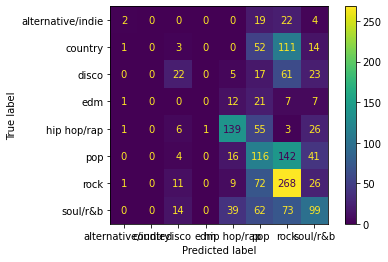

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Splits the data into training and testing sets
# We stratify the sets so the sets of a proportionate amount of each genre
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    stratify=Y, 
                                                    test_size=0.30)

# Create LDA and fit it to the training data
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, Y_train);

# Make predictions with the trained model
Y_pred = lda_clf.predict(X_test)

# Print metrics and confusion matrix
print(metrics.classification_report(Y_test,Y_pred))

plot_confusion_matrix(lda_clf, X_test, Y_test)
plt.show()

In our confusion matrix, the columns refer to the predicted label and the rows refer to the true label of the observations. Each square shows the number of true/predicted label pairs. For instance, we can see that 268 observations that were predicted as rock were actually rock. We also see that that for some heavily populated squares the predicted and true genres do not match up. For instance, for observations that were actually country, 52 were predicted as pop and 111 were predicted as rock. This tells us that the features of some genres may be very similar, which makes sense for country, pop, and rock. It also tells that we may not have classified songs into the right genres. To limit the amount of genres that had few or no correct predictions, let's perform the same analysis on only rock, pop, hip hop/rap, and r&b/soul.

              precision    recall  f1-score   support

 hip hop/rap       0.67      0.65      0.66       232
         pop       0.40      0.36      0.38       319
        rock       0.53      0.70      0.60       387
    soul/r&b       0.43      0.31      0.36       287

    accuracy                           0.51      1225
   macro avg       0.51      0.50      0.50      1225
weighted avg       0.50      0.51      0.50      1225



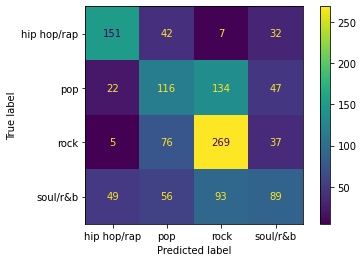

In [7]:
# Drop the genres we are no longer looking at
data = data[data['Top Genre'] != "country"]
data = data[data['Top Genre'] != "edm"]
data = data[data['Top Genre'] != "disco"]
data = data[data['Top Genre'] != "alternative/indie"]

# Obtain inputs and outputs
X = data[feature_list].values
Y = data['Top Genre'].values

# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    stratify=Y, 
                                                    test_size=0.30)
# Create and fit LDA
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, Y_train);

# Predict on test set
Y_pred = lda_clf.predict(X_test)

# Print metrics and confusion matrix
print(metrics.classification_report(Y_test,Y_pred))

plot_confusion_matrix(lda_clf, X_test, Y_test)
plt.show()

Much better! Now we have a good amount of correct predictions for every genre. It still seems that a large number of pop and soul/r&b songs are being misclassified as rock. However, the majority of rock and hip hop/rap songs are correctly predicted. Looking at the classification report, we have three metrics: precision, recall, and f1 score. The precision for a genre measures the ability of the classifier to not measure an observation of another genre as that genre (i.e. more false positives = less precision). The recall for a genre measures the ability of the classifier to find all instances of that genre. F1 score is the harmonic mean of precision and recall. For all three metrics, a score of 1 is the highest. Applying these, we can see that hip hop/rap has the best precision, meaning that few things that are actually not hip hop/rap are classfied as hip hop/rap. Rock has the best recall, meaning that most instances of rock are found and labelled as such.

While LDA seems to do fairly well in categorizing songs by genre, it does not give us an idea of what distinguishes the different genres. Another model, the decision tree classifier, can make observations about a song (i.e., ask questions about its audio features) and conclude its genre. Read about the model [here](https://en.wikipedia.org/wiki/Decision_tree_learning). Luckily, scikit has a easy way to visualize the model's decision making process.

Also, an important practice in datascience is parsimony. That is, limiting the amount of features you use in predictive model. Having too many features, especially in a decision tree with a large depth, can contribute to overfitting. As such, we will be only including a subset of features that displayed the smallest p-values in our Kruskal-Wallis Test from earlier.

TODO: Hyperparameters

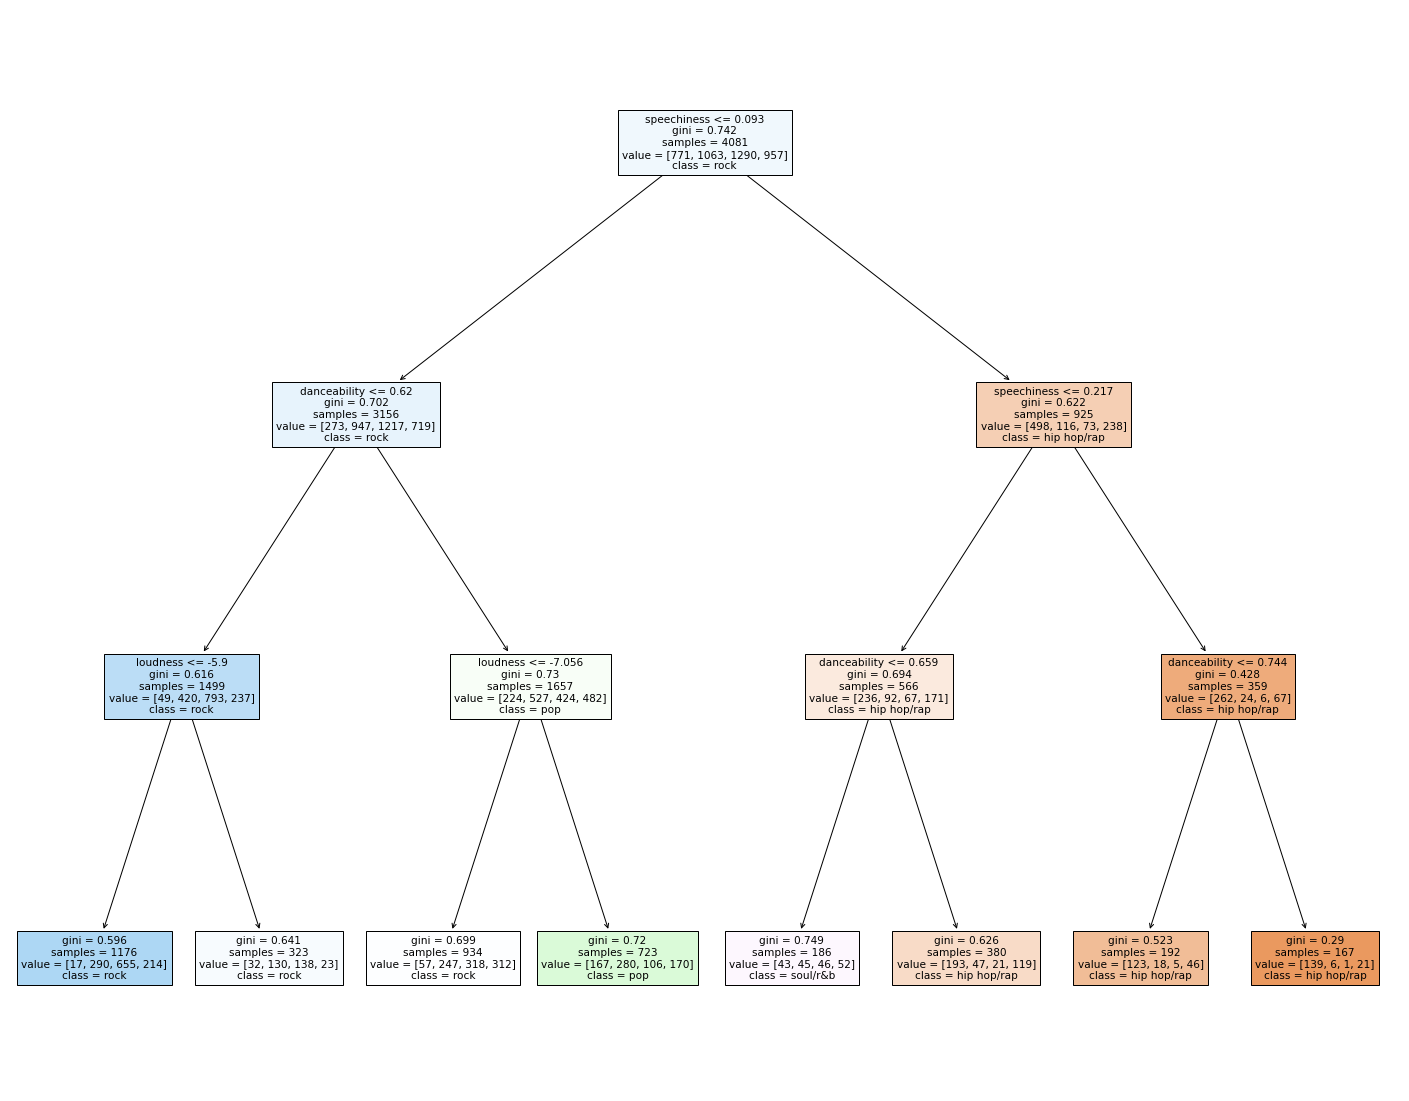

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Remove the features we are no longer using
feature_list = list(data.columns.values)
feature_list = feature_list[10:22]
feature_list.remove("liveness")
feature_list.remove("valence")
feature_list.remove("acousticness")
feature_list.remove("tempo")
feature_list.remove("key")

# List of genres we are looking at
genre_list = ['hip hop/rap',
             'pop','rock','soul/r&b']

# List of inputs and outputs
X = data[feature_list].values
Y = data['Top Genre'].values

# Create and fit a decision tree classifier
dt_clf = DecisionTreeClassifier(max_depth=3)
model = dt_clf.fit(X, Y)

# Plot the visualization of the decision tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_clf, 
                   feature_names=feature_list,
                   class_names=genre_list,
                   filled=True)

Each node of the resulting tree shows a decision step in the classifying process. For instance, the first node asks whether the song has a speechiness above a certain threshold. If it does, song goes to the right branch, if not it goes to the left. Once the song reaches a leaf, it is predicted to be whatever genre that leaf represents. From this, we can make observations like the fact that hip hop/rap tends to be speechy, which makes sense given the prescence of spoken word in that genre. Let's test the classifier and see how it compares to LDA.

              precision    recall  f1-score   support

 hip hop/rap       0.55      0.57      0.56       232
         pop       0.37      0.24      0.29       319
        rock       0.51      0.56      0.54       387
    soul/r&b       0.29      0.35      0.32       287

    accuracy                           0.43      1225
   macro avg       0.43      0.43      0.43      1225
weighted avg       0.43      0.43      0.43      1225



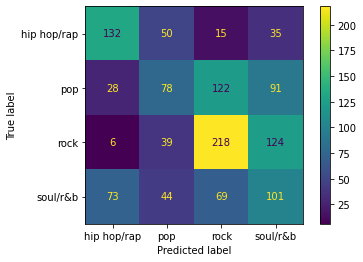

In [9]:
# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    stratify=Y, 
                                                    test_size=0.30)

# Create and fit classifier
dt_clf = DecisionTreeClassifier(max_depth=3)
model = dt_clf.fit(X_train, Y_train)

# Predict using fitted model
Y_pred = dt_clf.predict(X_test)

# Print metrics and confusion matrix
print(metrics.classification_report(Y_test,Y_pred))

plot_confusion_matrix(dt_clf, X_test, Y_test)
plt.show()

The result seems comparable to LDA. However, it seems that more songs were classified as soul/r&b, both correctly and incorrectly.

For our last classifier, we are going to try random forest. A random forest classifier essentially works by averaging the results of many decision trees. It is meant to counter the issue of overfitting prevelant in singular decision trees. You can read more about them [here](https://en.wikipedia.org/wiki/Random_forest).

TODO: Hyperparameters

              precision    recall  f1-score   support

 hip hop/rap       0.54      0.60      0.57       232
         pop       0.41      0.30      0.35       319
        rock       0.51      0.82      0.63       387
    soul/r&b       0.48      0.19      0.27       287

    accuracy                           0.50      1225
   macro avg       0.49      0.48      0.45      1225
weighted avg       0.48      0.50      0.46      1225



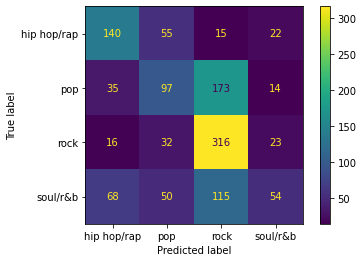

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    stratify=Y, 
                                                    test_size=0.30)

# Create and fit random forest classifier
rfc_clf = RandomForestClassifier(max_depth=3)
model = rfc_clf.fit(X_train, Y_train)

# Predict using trained model
Y_pred = rfc_clf.predict(X_test)

# Print metrics and confusion matrix
print(metrics.classification_report(Y_test,Y_pred))

plot_confusion_matrix(rfc_clf, X_test, Y_test)
plt.show()

Again, the model appears comparable to the other two. However, in this case, it seems to classify many more cases as rock, both correctly and incorrectly.

Comparing models through the confusion matrices alone is insufficient. For one, we based our analysis on a single training/test split. The performance of a model can vary greatly split-to-split. Secondly, it is difficult to compare models based on the quantity of actual/predicted pairings alone. How many of each genre were in the test split and what do we care about more, correctly classifiying rock samples or soul/r&b?

These questions are answered through cross validation. K-fold cross validation works by breaking the data into K random folds, where each fold represents 1/K of the data. The data is trained on the remaining part of the data and is tested on the 1/K fold. This is done K times, until all of these 1/K-sized samples have been scored. In our case, we are scoring with the f1 macro, which is applicable in multi-class scenarios and is the mean of the per-class f1 scores. As with f1 score, a score of 1 is the highest.

Scikit provides a cross validation function for its models. We will be using 10 folds, so we will test each model on 10 folds, returning the f1 macro for each fold.

In [11]:
from sklearn.model_selection import cross_val_score

# Create LDA and run 10-fold cross validation
lda_clf = LinearDiscriminantAnalysis()
lda_scores = cross_val_score(lda_clf, X, Y, cv=10, scoring='f1_macro')

# Create random forest and run 10-fold cross validation
rfc_clf = RandomForestClassifier(max_depth=3)
rfc_scores = cross_val_score(rfc_clf, X, Y, cv=10, scoring='f1_macro')

# Create decision tree and run 10-fold cross validation
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_scores = cross_val_score(dt_clf, X, Y, cv=10, scoring='f1_macro')

In [14]:
# Print average scores and standard error
print(f"Average LDA f1 score:{lda_scores.mean()}\tStandard Error:{lda_scores.std()}\n")
print(f"Average RFC f1 score:{rfc_scores.mean()} \tStandard Error:{rfc_scores.std()}\n")
print(f"Average DT f1 score:{dt_scores.mean()}  \tStandard Error:{dt_scores.std()}\n")

Average LDA f1 score:0.48604832593261077	Standard Error:0.03529134309428848

Average RFC f1 score:0.4514266286275598 	Standard Error:0.024563216909104436

Average DT f1 score:0.3885433942651619  	Standard Error:0.04012772693405444



In [13]:
# Run Kruskal-Wallis on the three score lists
t, p = scipy.stats.kruskal(lda_scores,rfc_scores,dt_scores)
print(f"t: {t}\tp-value: {p}")

t: 17.23612903225805	p-value: 0.00018080987084243428


Judging by our cross validation procedure, LDA performed the best with the highest mean macro f1 score. Random forest performed the next best and decision tree performed the worst. Our Kruskal-Wallis Test produced a very small p-value, meaning we can reject the null hypothesis at the 0.05 level of significance that the models have the same mean f1 score. This means that it is very likely that the models perform differently.

TODO: disccussion on parameters and maybe improvements and stuff